In [53]:
import pandas as pd
import seaborn as sns
import numpy as np

import matplotlib.pyplot as plt

In [54]:
# read the raw dataset
df = pd.read_csv('../data/raw/data.csv')

In [55]:
# explore dataframe
df.head(5)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0


In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [57]:
df.shape

(6362620, 11)

In [58]:
# to set pandas to display the summary statistics in fixed point rather than exponential notation
pd.set_option('display.float_format', '{:.2f}'.format)
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6362620.00,6362620.00,6362620.00,6362620.00,6362620.00,6362620.00,6362620.00,6362620.00
mean,243.40,179861.90,833883.10,855113.67,1100701.67,1224996.40,0.00,0.00
std,142.33,603858.23,2888242.67,2924048.50,3399180.11,3674128.94,0.04,0.00
min,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,156.00,13389.57,0.00,0.00,0.00,0.00,0.00,0.00
50%,239.00,74871.94,14208.00,0.00,132705.66,214661.44,0.00,0.00
75%,335.00,208721.48,107315.18,144258.41,943036.71,1111909.25,0.00,0.00
max,743.00,92445516.64,59585040.37,49585040.37,356015889.35,356179278.92,1.00,1.00


For our initial exploration since the data is large we will randomly sample 100,000 for the visualizations when we are exploring the data set. This is in order to limit the time it takes to generate the graphs.

In [59]:
# sample 100,000 from the 6 million+ dataset

sample_df = df.sample(n=int(1e5))

# Univariate Analysis

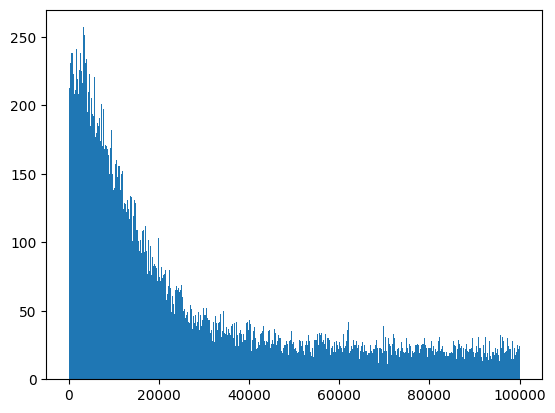

In [60]:
# univariate analysis
# histogram of the amount
plt.hist(sample_df["amount"], range=(0, 1e5), bins=1000)
plt.show()


We see that this is right skewed and that most of the amounts that are being transfered are less than 20,000. 

# Bivariate Analysis

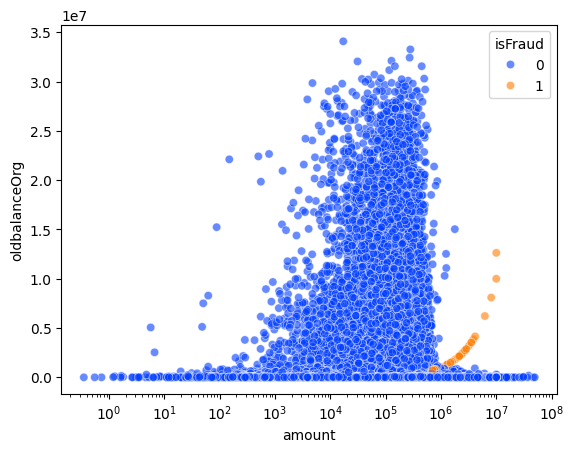

In [67]:
sns.scatterplot(data=sample_df, x='amount', y='oldbalanceOrg', hue='isFraud', palette='bright', alpha=0.6)
plt.xscale('log')

From the scatterplot we can clearly see that there seems to be a pattern in which transactions are fraud with most of them having an oldbalanceOrg and being 10^7 in amount.

In [62]:
# bivariate analysis


In [63]:
# multivariate analysis

# Heatmap 

In [64]:
# drop non-numerical columns
sample_df = sample_df.drop(['step', 'nameDest', 'nameOrig', 'type'], axis=1)

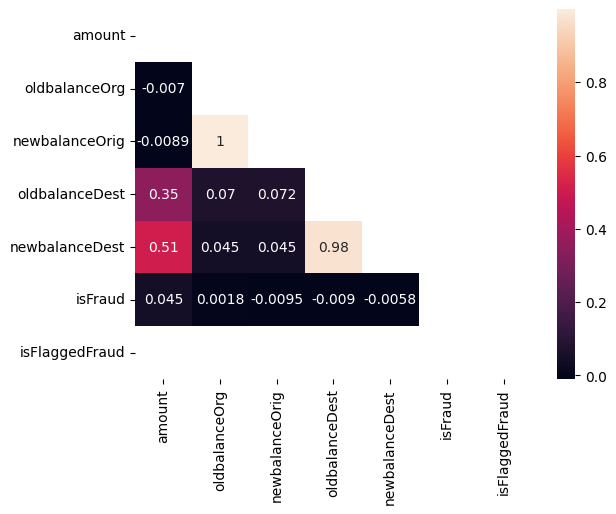

In [65]:
# plot a correlation heat map of selected columns in the dataset
mask = np.triu(np.ones_like(sample_df.corr(), dtype=bool))

sns.heatmap(sample_df.corr(), annot=True, mask=mask)
plt.show()